In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

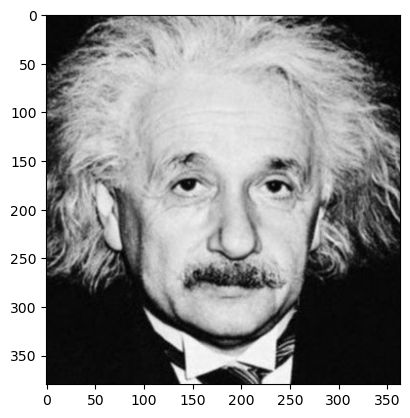

In [7]:
img=cv2.imread('a1images/einstein.png', 0)
plt.imshow(img, cmap='gray')

In [9]:
sobel_filterX = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_filterY = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

In [11]:
gradient_x = cv2.filter2D(img, cv2.CV_64F, sobel_filterX)
gradient_y = cv2.filter2D(img, cv2.CV_64F, sobel_filterY)


gradient = cv2.convertScaleAbs(cv2.magnitude(gradient_x, gradient_y))


(-0.5, 363.5, 379.5, -0.5)

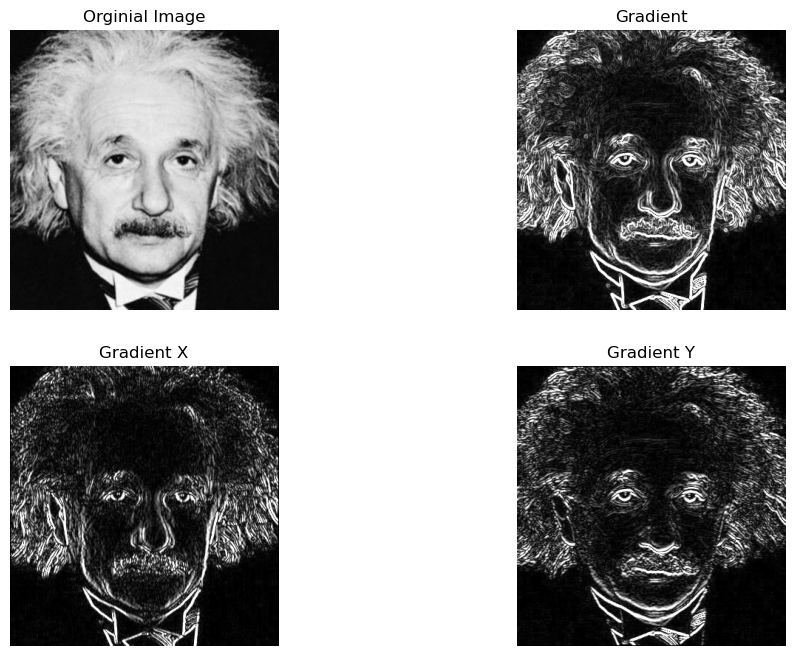

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Orginial Image')
plt.axis('off') 

plt.subplot(2,2,2)
plt.imshow(gradient,cmap='gray')
plt.title('Gradient')
plt.axis('off')    

plt.subplot(2,2,3)
plt.imshow(cv2.convertScaleAbs(gradient_x), cmap="gray")
plt.title('Gradient X')
plt.axis('off')    

plt.subplot(2,2,4)
plt.imshow(cv2.convertScaleAbs(gradient_y), cmap="gray")
plt.title('Gradient Y')
plt.axis('off')    

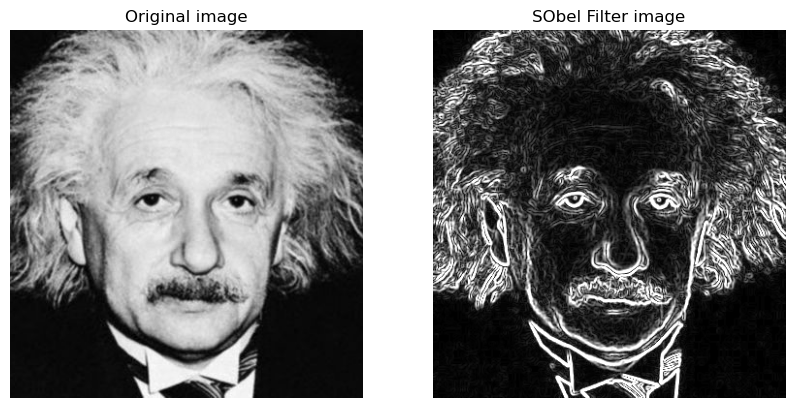

In [29]:
from scipy.signal import convolve2d

gradient_x2 = convolve2d(img, sobel_x, mode='same', boundary='symm')
gradient_y2 = convolve2d(img, sobel_y, mode='same', boundary='symm')

gradient2 = np.sqrt(gradient_x2**2 + gradient_y2**2)
gradient2 = np.clip(gradient2, 0, 255).astype(np.uint8)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(1,2,2)

plt.imshow(gradient2, cmap="gray")
plt.title("SObel Filter image")
plt.axis("off")
plt.show()


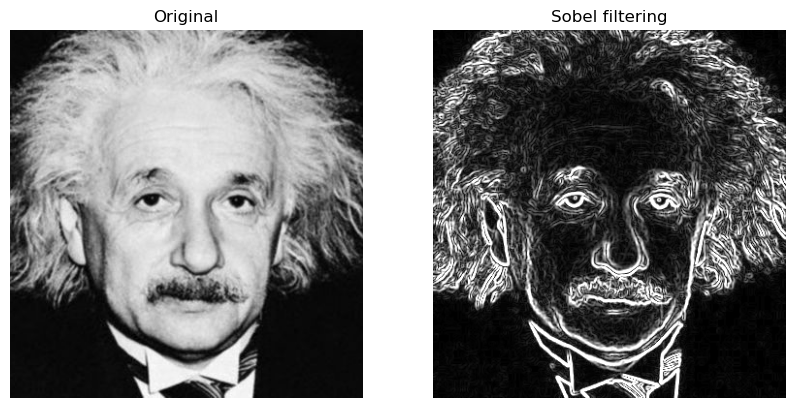

In [37]:
# Separable kernels
smooth = np.array([[1], [2], [1]], dtype=np.float32)
diff   = np.array([[1, 0, -1]], dtype=np.float32)

gradient_x3 = convolve2d(img, smooth, mode='same', boundary='symm')
gradient_x3 = convolve2d(gradient_x3, diff, mode='same', boundary='symm')

gradient_y3 = convolve2d(img, diff.T, mode='same', boundary='symm')
gradient_y3 = convolve2d(gradient_y3, np.array([[1, 2, 1]], dtype=np.float32), 
                    mode='same', boundary='symm')

gradient3 = np.sqrt(gradient_x3**2 + gradient_y3**2)
gradient3 = np.clip(gradient3, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(grad_mag, cmap="gray")
plt.title("Sobel filtering")
plt.axis("off")
plt.show()